<a href="https://colab.research.google.com/github/MotoBenny/Hands-on-ML/blob/main/Chapter3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3: Classification

Working with the MNIST dataset to classify handwritten digits. 

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False) # using the fetch openml function bundled with sklearn to download this very common dataset.
# as this dataset contains images, we dont want it to import as a pandas dataframe. hence as_frame=False
# instead we receive the data as NumPy arrays

# other functions of this tool include:
# load() to load small toy datasets bundled with sklearn
# make() to generate datasets, useful for testing. 

In [2]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
X.shape

(70000, 784)

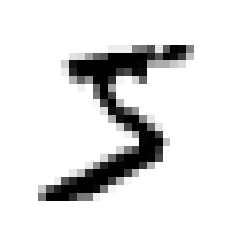

In [8]:
# lets look at a single image from our dataset.

import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28,28) # reshaping to a 28x28 array so we can use imshow to display it. 
  plt.imshow(image, cmap="binary") # cmap gets us a greyscale color map where 0 is white and 255 is black
  plt.axis("off")

some_digit = X[0] # change this number here from 0 to 69999 to see a specific instance feature
plot_digit(some_digit)
plt.show()

In [9]:
y[0] # our X value for each feature instance is the image itself, or rather its vector.
# where our y value is the label within the dataset, here we can see that this first digit is a 5

'5'

# Test set

This dataset is already split for us, with a test set comprised of the last 10K images.

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Identifying a single digit, Binary Classifier.


In [13]:
y_train_5= (y_train == '5') # return True for all 5s False for any other digit. 
y_test_5 = (y_test == '5')

## Picking a classifier and training it.

Starting with a stochastic gradient decent with the built in sklearn class.
These classifiers are greate with very large datasets. 

In [14]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [16]:
# now we can use the model to detect the number 5
sgd_clf.predict([some_digit])

array([ True])

# Evaluating the classifyier.

This is generally significantly harder than evaluating a regressor model. 
lets try cross-validation

In [17]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [18]:
# how about the dummyclassifier?

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [19]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

Great! we are getting over 90% accuracy. But its only because only 10% of the images are actually 5s, so our model will always guess that an image is not a 5, and its right about 90% of the time. This wont do.